## Step 1: Import Libraries
To begin, we need to import essential libraries that will help us with data manipulation, visualization, preprocessing, model training, and evaluation.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn.metrics as metrics

## Step 2: Load Dataset
We load the dataset containing laptop price information. The dataset is stored as a CSV file and read using pandas.

In [78]:
df=pd.read_csv("laptop_price.csv",encoding="latin-1")

### Display Dataset
Let's display the dataset to understand its structure, including the columns and the first few rows.

In [79]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


## Step 3: Data Preprocessing
### Drop unnecessary columns
Some columns may not be useful for training the model. We drop the 'Product' column as it likely contains unique identifiers that do not contribute to price prediction.

In [80]:
df=df.drop("Product",axis=1)

### Encode categorical variables
Machine learning models require numerical input. We convert categorical features into numerical representations using one-hot encoding.

In [81]:
df=df.join(pd.get_dummies(df.Company))
df=df.drop("Company",axis=1)

In [82]:
df=df.join(pd.get_dummies(df.TypeName))
df=df.drop("TypeName",axis=1)

In [83]:
df["ScreenResolution"]=df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"]=df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"]=df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [84]:
df["Cpu Brand"]=df.Cpu.str.split(" ").apply(lambda x: x[0])
df["Cpu Frequency"]= df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [85]:
df=df.drop("Cpu",axis=1)

In [86]:
df=df.drop("ScreenResolution",axis=1)

In [87]:
df["Cpu Frequency"]=df["Cpu Frequency"].str[:-3]

In [88]:
df["Ram"]=df["Ram"].str[:-2]

In [89]:
df["Ram"]=df["Ram"].astype("int")
df["Cpu Frequency"]=df["Cpu Frequency"].astype("float")

In [90]:
df["Screen Width"]=df["Screen Width"].astype("int")
df["Screen Height"]=df["Screen Height"].astype("int")

In [91]:
df["Memory Amount"]=df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"]=df.Memory.str.split(" ").apply(lambda x: x[1:])

In [92]:
def turn_memory_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [93]:
df["Memory Amount"]= df["Memory Amount"].apply(turn_memory_MB)

In [94]:
df =df.drop("Memory",axis=1)

In [95]:
df["Weight"]= df["Weight"].str[:-2]

In [96]:
df["Weight"] =df["Weight"].astype(float)

In [97]:
df["Gpu Brand"]= df["Gpu"].str.split(" ").apply(lambda x: x[0])

In [98]:
df = df.drop("Gpu", axis=1)

In [99]:
df=df.join(pd.get_dummies(df.OpSys))
df=df.drop("OpSys",axis=1)

In [100]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Gpu Brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,1.37,1339.69,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
1,2,13.3,8,1.34,898.94,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
2,3,15.6,8,1.86,575.00,False,False,False,False,False,...,Intel,False,False,False,False,True,False,False,False,False
3,4,15.4,16,1.83,2537.45,False,True,False,False,False,...,AMD,False,False,False,False,False,False,False,False,True
4,5,13.3,8,1.37,1803.60,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1299,1317,13.3,16,1.30,1499.00,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1300,1318,14.0,2,1.50,229.00,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1301,1319,15.6,6,2.19,764.00,False,False,False,False,False,...,AMD,False,False,False,False,False,True,False,False,False


In [101]:
cpu_categories= pd.get_dummies(df["Cpu Brand"])
cpu_categories.columns=[col + "_CPU" for col in cpu_categories.columns]

df =df.join(cpu_categories)
df =df.drop("Cpu Brand", axis=1)

In [102]:
gpu_categories= pd.get_dummies(df["Gpu Brand"])
gpu_categories.columns=[col + "_GPU" for col in gpu_categories.columns]

df =df.join(gpu_categories)
df =df.drop("Gpu Brand", axis=1)

In [103]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
1,2,13.3,8,1.34,898.94,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,3,15.6,8,1.86,575.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,4,15.4,16,1.83,2537.45,False,True,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,5,13.3,8,1.37,1803.60,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1299,1317,13.3,16,1.30,1499.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1300,1318,14.0,2,1.50,229.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1301,1319,15.6,6,2.19,764.00,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [104]:
df.select_dtypes(include=[float, int, bool]).corr()


,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.057721,-0.119585,-0.044252,-0.043348,-0.013628,...,-0.061942,0.194094,-0.158931,-0.055338,0.049765,0.039920,-0.089050,0.039920,0.094479,-0.037596
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,...,-0.093285,-0.064775,-0.100867,0.129801,-0.122000,-0.052816,0.207023,-0.052816,-0.592264,0.486561
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,...,-0.021374,-0.017529,0.028914,-0.104759,0.107051,-0.023894,-0.093119,-0.023894,-0.319551,0.415464
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,...,-0.087904,-0.048100,-0.096042,0.062641,-0.057386,-0.037026,0.106519,-0.037026,-0.596378,0.565232
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,...,0.018312,0.152381,0.089928,-0.180111,0.181127,-0.018431,-0.199415,-0.018431,-0.184205,0.348797
Acer,-0.057721,0.009435,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,...,-0.023027,-0.055411,-0.029411,0.068130,-0.066566,-0.008119,-0.034859,-0.008119,0.005305,0.020848
Apple,-0.119585,-0.158850,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,...,-0.010059,-0.024206,0.784352,-0.028607,0.028849,-0.003547,0.001749,-0.003547,0.078028,-0.085183
Asus,-0.044252,0.112766,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,...,0.030999,-0.070257,-0.037291,0.038455,-0.036835,-0.010295,-0.073770,-0.010295,-0.106654,0.170742
Chuwi,-0.043348,-0.017426,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,...,-0.003776,-0.009086,-0.004822,-0.010737,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972
Dell,-0.013628,0.045288,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,...,-0.042706,-0.032633,-0.054545,-0.121448,0.122473,-0.015058,0.190722,-0.015058,-0.075707,-0.060187


## Step 4: Visualizing Data with Heatmaps
Before training our model, it's important to understand feature correlations. A heatmap helps us visualize how different variables are related.


Text(0.5, 1.0, 'Feature Correlation Heatmap')

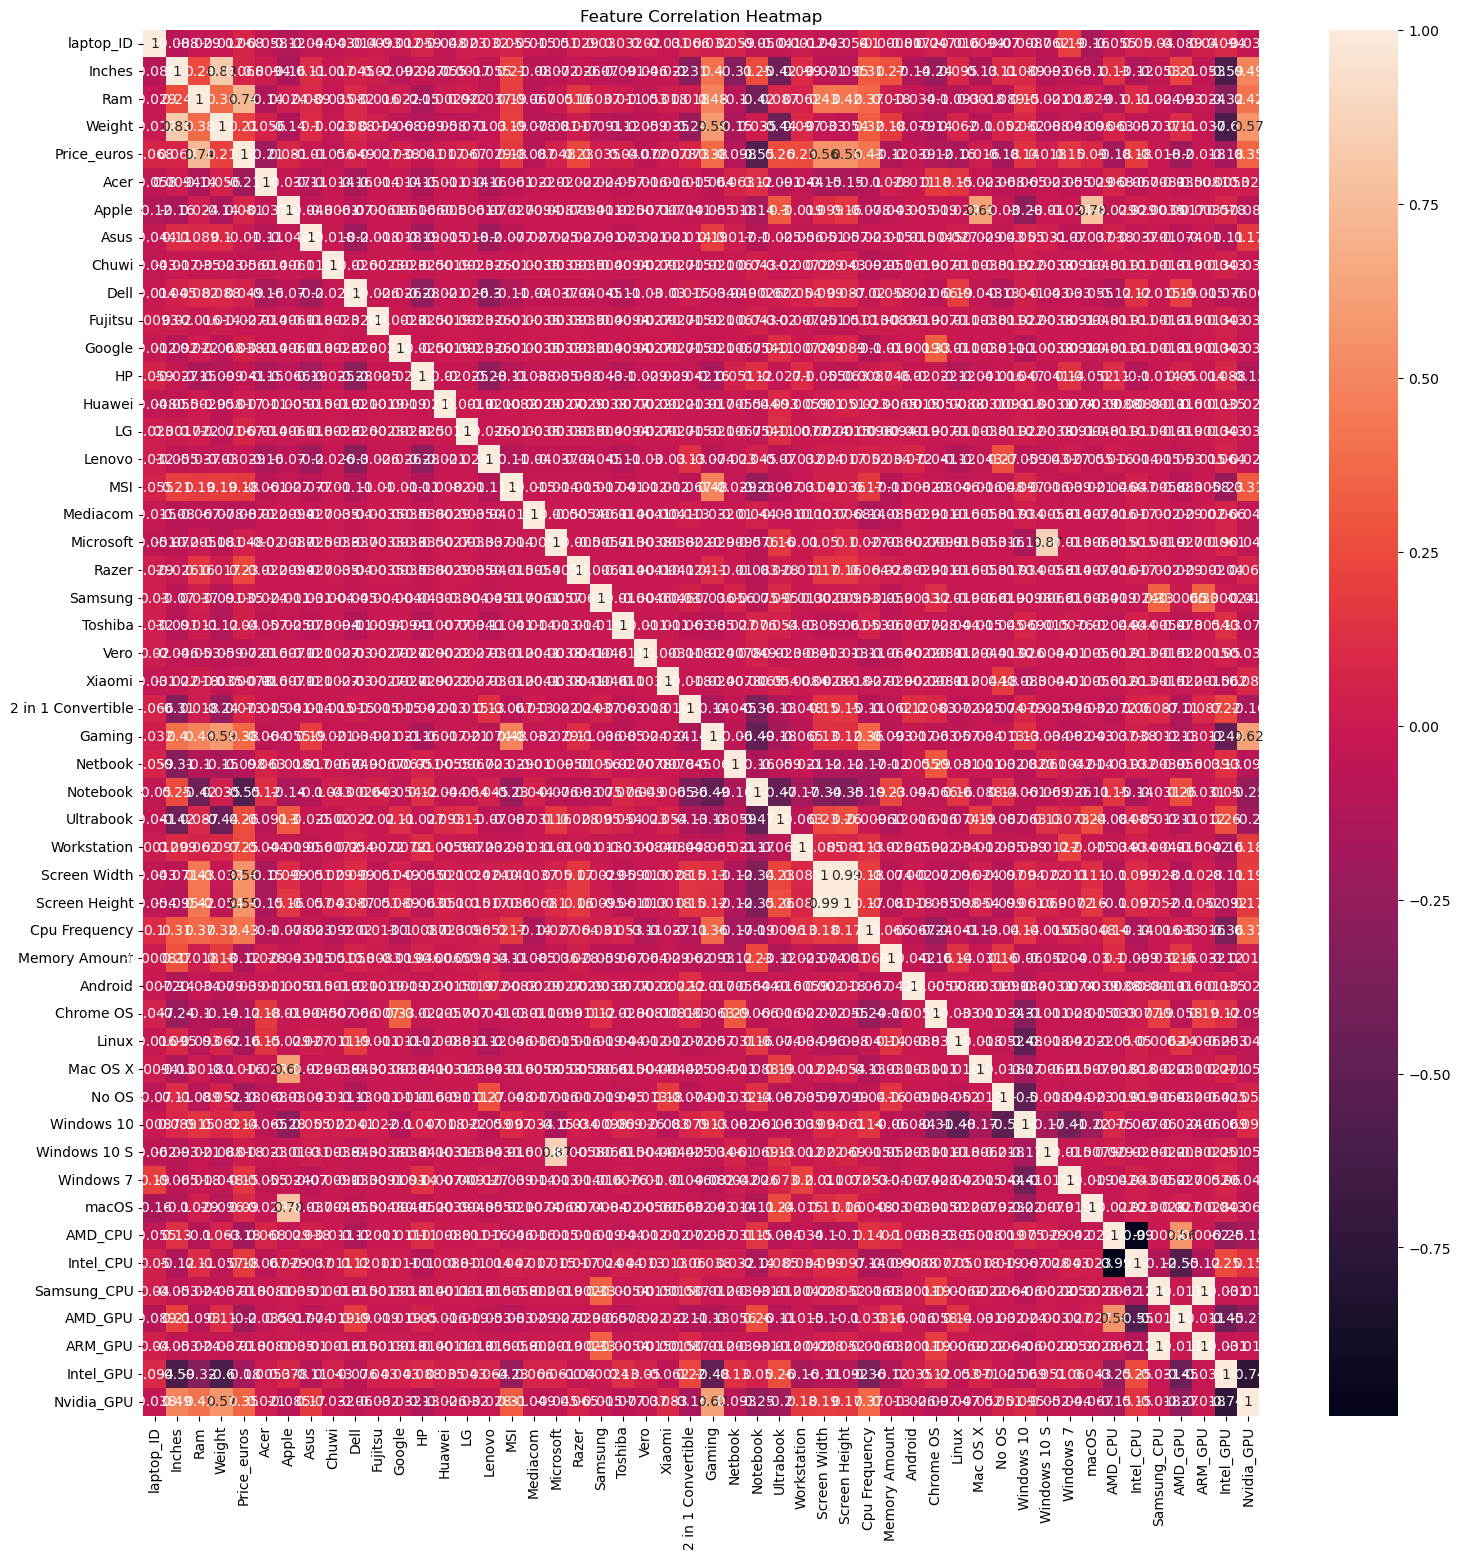

In [110]:
plt.figure(figsize=(18,18))
sns.heatmap(df.select_dtypes(include=[float, int, bool]).corr(),annot=True)
plt.title("Feature Correlation Heatmap")

In [111]:
target_correlations= df.select_dtypes(include=[float, int, bool]).corr()['Price_euros'].apply(abs).sort_values()
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [112]:
selected_features = target_correlations[-21: ].index
selected_features =list(selected_features)
selected_features

['Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'Cpu Frequency',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [113]:
selected_df =df[selected_features]
selected_df

,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,...,Workstation,Ultrabook,Nvidia_GPU,Gaming,Cpu Frequency,Notebook,Screen Height,Screen Width,Ram,Price_euros
0,False,False,False,False,False,True,True,False,False,1.37,...,False,True,False,False,2.3,False,1600,2560,8,1339.69
1,False,False,False,False,False,True,True,False,False,1.34,...,False,True,False,False,1.8,False,900,1440,8,898.94
2,False,False,True,False,False,True,True,False,False,1.86,...,False,False,False,False,2.5,True,1080,1920,8,575.00
3,False,False,False,False,False,True,False,True,False,1.83,...,False,True,False,False,2.7,False,1800,2880,16,2537.45
4,False,False,False,False,False,True,True,False,False,1.37,...,False,True,False,False,3.1,False,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,True,True,False,False,1.80,...,False,False,False,False,2.5,False,1080,1920,4,638.00
1299,False,False,False,False,False,True,True,False,False,1.30,...,False,False,False,False,2.5,False,1800,3200,16,1499.00
1300,False,False,False,False,False,True,True,False,False,1.50,...,False,False,False,False,1.6,True,768,1366,2,229.00
1301,False,False,False,False,False,True,False,True,False,2.19,...,False,False,False,False,2.5,True,768,1366,6,764.00


<Axes: >

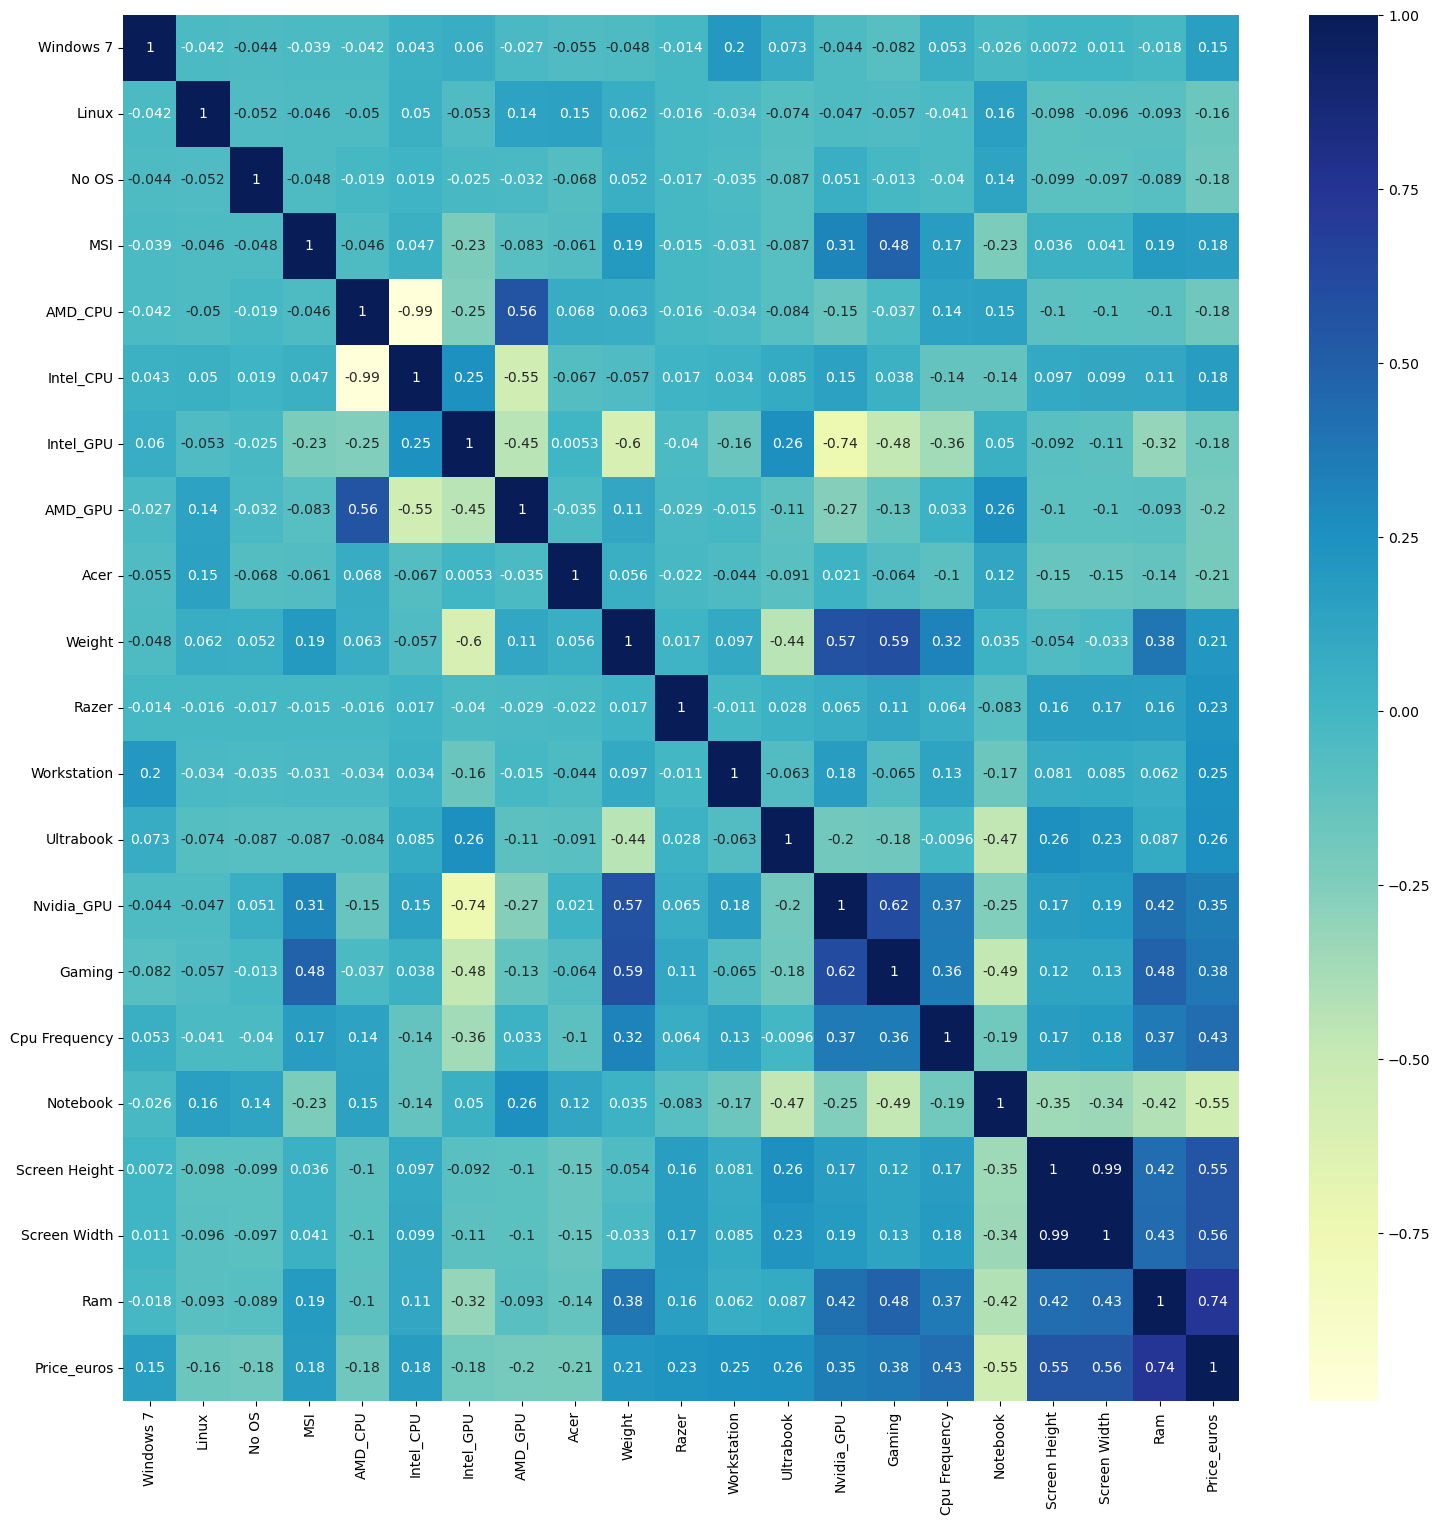

In [109]:
plt.figure(figsize=(18,18))
sns.heatmap(selected_df.corr(),annot=True,cmap="YlGnBu")

## Step 5: Split Data into Train & Test Sets
We split the dataset into training and testing sets. The training set is used to fit the model, while the test set evaluates its performance.

In [73]:
X, y = selected_df.drop("Price_euros",axis=1), selected_df["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scalar= StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Step 6: Train Model (Random Forest Regressor)
We train a Random Forest Regressor model using the training data. Random forests are an ensemble learning method that improves prediction accuracy.

In [74]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [75]:
forest.score(X_test_scaled,y_test)

-0.19049105330897587

## Step 7: Make Predictions
Once trained, we use the model to make price predictions on the test set.

In [54]:
y_pred= forest.predict(X_test_scaled)

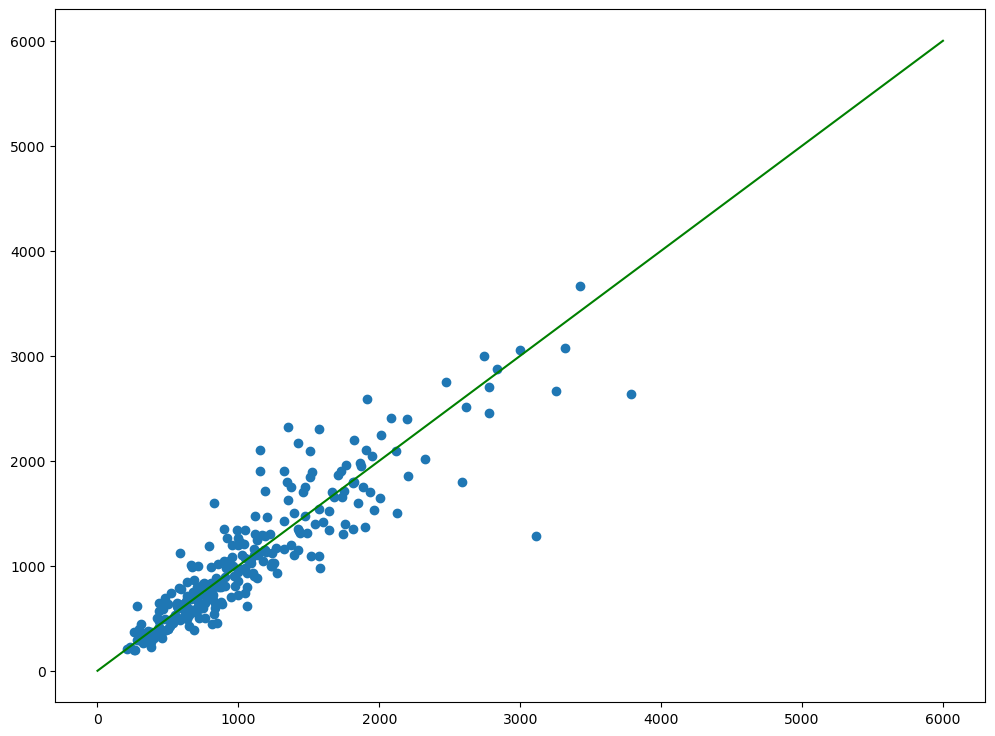

In [55]:
plt.figure(figsize=(12,9))
plt.scatter(y_pred,y_test)
plt.plot(range(0,6000),range(0,6000),c="green")

In [39]:
#X_test.iloc[1]

#scalar.transform([X_test.iloc[1]])
forest.predict(scalar.transform([X_test.iloc[1]]))

C:\Users\vamshikrishna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([950.30394119])

In [40]:
y_test.iloc[1]

679.0

## Step 8: Evaluate Model
To measure the performance of our model, we calculate key metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.


In [59]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Step 9: Display Performance Metrics
Finally, we print the calculated metrics to assess how well the model predicts laptop prices.

In [60]:
print("Model Performance Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

Model Performance Metrics:
MAE: 187.9351612701315
MSE: 79846.93046392388
R2 Score: 0.8094339950735934
